In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [9]:
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = torchvision.transforms.ToTensor(), 
    download = True,            
)
test_data = torchvision.datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = torchvision.transforms.ToTensor()
)

In [10]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [11]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [12]:
train_data.data.size()

torch.Size([60000, 28, 28])

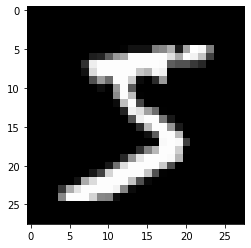

In [13]:
import matplotlib.pyplot as plt

plt.imshow(train_data.data[0], cmap='gray')

In [61]:
# Flatten input data
X_test=torch.flatten(train_data.data,start_dim=1).float()
y_test=train_data.targets
X_test=X_test/255 # 데이터를 0~1로 정규화

In [62]:
#training
din, dh1, dh2, dout = 28*28,128,64,10
model = torch.nn.Sequential(
    torch.nn.Linear(din,dh1), # input - hidden1
    torch.nn.ReLU(),         # activation function of hidden layer 
    torch.nn.Linear(dh1,dh2), # input - hidden1
    torch.nn.ReLU(),         # activation function of hidden layer 
    torch.nn.Linear(dh2,dout), # hidden - out
    torch.nn.Softmax(dim=1)
)

In [63]:
# loss and optimizer
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [66]:
# learning
nums_epoch = 100
def train(model, criterion, optimizer, nums_epoch, X, y, X_test, y_test):
    for epoch in range(nums_epoch):
        y_pred = model(X)
        loss = criterion(y_pred,y)
        
        optimizer.zero_grad() # zero_grad(): 미분값 초기화
        loss.backward() # backpropagation
        optimizer.step() # update weights and biases
        
        if(epoch%10==0):
            y_pred=model(X)
            prediction = y_pred.max(1)[1] # max indices
            corrects = (prediction == y)
            accuracy = corrects.sum().float() / float( y.size(0) )
            
            y_test_pred=model(X_test)
            prediction = y_pred.max(1)[1] # max indices
            corrects = (prediction == y)
            accuracy = corrects.sum().float() / float( y.size(0) )
            print(epoch, "loss=", loss.item(), "accu=", accuracy.item())

In [67]:
train(model,criterion, optimizer, nums_epoch, X, y, X_test, y_test);

0 loss= 1.6820738315582275 accu= 0.7784500122070312
10 loss= 1.680952787399292 accu= 0.7792166471481323
20 loss= 1.6799651384353638 accu= 0.7801166772842407
30 loss= 1.678980827331543 accu= 0.7809833288192749
40 loss= 1.6781196594238281 accu= 0.7816500067710876
50 loss= 1.6773507595062256 accu= 0.7821833491325378
60 loss= 1.6765673160552979 accu= 0.782966673374176
70 loss= 1.675854206085205 accu= 0.7834500074386597
80 loss= 1.6752761602401733 accu= 0.7837666869163513
90 loss= 1.6747229099273682 accu= 0.784166693687439


# dropout

In [68]:
din, dh1, dh2, dout = 28*28,128,64,10
model_dropout = torch.nn.Sequential(
    torch.nn.Linear(din,dh1), # input - hidden1
    torch.nn.ReLU(),         # activation function of hidden layer 
    torch.nn.Dropout(p=0.5),# dropout
    
    torch.nn.Linear(dh1,dh2), # input - hidden1
    torch.nn.ReLU(),         # activation function of hidden layer 
    torch.nn.Dropout(p=0.5),
    
    torch.nn.Linear(dh2,dout), # hidden - out
    torch.nn.Softmax(dim=1)
)

In [71]:
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_dropout.parameters(),lr=learning_rate)

In [74]:
train(model_dropout, criterion, optimizer, nums_epoch, X, y, X_test, y_test)

0 loss= 2.35164737701416 accu= 0.1701333373785019
10 loss= 1.878660798072815 accu= 0.5962666869163513
20 loss= 1.740362286567688 accu= 0.730566680431366
30 loss= 1.6467989683151245 accu= 0.8193166851997375
40 loss= 1.6006132364273071 accu= 0.8639833331108093
50 loss= 1.5784047842025757 accu= 0.8844666481018066
60 loss= 1.5645368099212646 accu= 0.8980000019073486
70 loss= 1.5557726621627808 accu= 0.9056833386421204
80 loss= 1.5474731922149658 accu= 0.9141499996185303
90 loss= 1.542384386062622 accu= 0.9205166697502136


In [76]:
loader = torch.utils.data.DataLoader(
    dataset = train_data,
    batch_size=100
)

In [77]:
loader.dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [78]:
for x,y in loader:
    print(y)

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])
tensor([5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7,
        1, 8, 6, 4, 1, 6, 3, 4, 5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6,
        7, 3, 4, 6, 1, 9, 9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2,
        9, 5, 1, 5, 9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9,
        7, 8, 3, 2])
tensor([1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5, 2, 6, 4, 7,
        1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6, 3, 7, 5, 8, 0, 9,
        1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7, 9, 8, 5, 9, 2, 1, 1, 4,
        4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9, 6, 5, 7, 4, 1, 3, 4, 0, 4, 8

tensor([9, 2, 6, 3, 1, 5, 0, 6, 4, 7, 8, 8, 7, 9, 6, 0, 1, 0, 7, 1, 5, 0, 5, 1,
        0, 2, 2, 3, 8, 0, 1, 6, 3, 9, 7, 6, 8, 6, 6, 5, 9, 2, 0, 9, 6, 1, 5, 4,
        2, 9, 7, 5, 3, 7, 1, 5, 6, 6, 7, 7, 3, 3, 6, 1, 2, 4, 7, 1, 8, 3, 2, 3,
        8, 7, 5, 3, 7, 9, 8, 8, 6, 8, 8, 8, 2, 8, 4, 8, 1, 4, 5, 7, 1, 2, 2, 1,
        9, 9, 5, 8])
tensor([2, 7, 9, 9, 7, 3, 7, 3, 1, 0, 6, 7, 9, 5, 2, 4, 1, 1, 0, 1, 3, 2, 9, 6,
        4, 1, 3, 5, 9, 0, 1, 1, 4, 2, 3, 3, 0, 4, 2, 5, 3, 6, 4, 7, 5, 0, 0, 1,
        2, 2, 7, 3, 7, 4, 7, 5, 6, 6, 5, 7, 3, 8, 1, 9, 9, 0, 7, 1, 8, 2, 0, 3,
        4, 4, 3, 5, 1, 6, 7, 9, 5, 8, 0, 2, 1, 6, 3, 9, 3, 6, 2, 1, 2, 9, 1, 9,
        3, 9, 9, 4])
tensor([4, 4, 2, 3, 9, 8, 0, 1, 4, 4, 8, 1, 2, 2, 7, 9, 3, 0, 3, 4, 3, 9, 6, 1,
        2, 7, 0, 4, 6, 4, 1, 1, 4, 8, 3, 7, 6, 6, 2, 0, 2, 8, 8, 1, 7, 8, 2, 2,
        7, 6, 6, 2, 7, 1, 0, 2, 4, 5, 1, 4, 9, 5, 6, 6, 0, 7, 2, 7, 5, 5, 1, 3,
        1, 0, 4, 2, 1, 2, 1, 2, 6, 7, 0, 3, 6, 5, 3, 2, 4, 1, 0, 4, 2, 4, 1, 3

tensor([8, 9, 0, 0, 1, 8, 7, 3, 9, 9, 5, 5, 9, 6, 7, 8, 2, 4, 6, 9, 8, 1, 6, 7,
        9, 1, 6, 2, 0, 9, 6, 6, 2, 9, 1, 1, 2, 1, 3, 1, 5, 2, 7, 8, 0, 1, 0, 2,
        8, 0, 2, 7, 3, 7, 5, 5, 1, 8, 2, 2, 6, 9, 1, 8, 7, 4, 0, 6, 0, 7, 3, 1,
        0, 6, 6, 0, 9, 3, 4, 6, 7, 8, 9, 7, 3, 0, 0, 4, 0, 2, 6, 7, 5, 4, 6, 4,
        8, 2, 0, 8])
tensor([7, 1, 7, 5, 1, 1, 2, 2, 7, 5, 6, 6, 7, 4, 2, 3, 9, 0, 2, 0, 9, 0, 4, 3,
        4, 7, 7, 0, 3, 6, 0, 4, 3, 8, 6, 8, 1, 3, 8, 9, 0, 9, 0, 8, 0, 2, 8, 7,
        8, 7, 9, 1, 7, 0, 3, 1, 4, 2, 3, 3, 8, 4, 9, 5, 6, 6, 4, 7, 0, 8, 3, 9,
        8, 0, 6, 1, 8, 2, 5, 3, 2, 4, 5, 5, 6, 6, 9, 7, 3, 8, 9, 9, 3, 0, 8, 1,
        3, 2, 0, 3])
tensor([2, 4, 9, 5, 9, 6, 4, 7, 3, 8, 4, 9, 3, 6, 5, 2, 7, 5, 8, 6, 2, 2, 7, 5,
        5, 1, 9, 7, 1, 1, 8, 8, 3, 3, 3, 8, 2, 7, 2, 1, 5, 7, 3, 1, 4, 4, 7, 7,
        7, 2, 4, 6, 5, 5, 9, 3, 5, 9, 3, 9, 8, 0, 0, 8, 0, 7, 6, 3, 0, 0, 0, 3,
        7, 7, 8, 0, 8, 1, 9, 1, 2, 2, 4, 1, 1, 6, 6, 0, 0, 5, 4, 3, 9, 3, 1, 6

tensor([2, 8, 7, 0, 0, 1, 3, 2, 9, 4, 3, 5, 4, 6, 3, 7, 4, 8, 6, 9, 1, 0, 8, 1,
        6, 4, 5, 5, 2, 6, 0, 7, 9, 8, 6, 9, 4, 0, 3, 1, 0, 4, 0, 7, 5, 0, 6, 9,
        1, 9, 8, 7, 4, 7, 0, 5, 2, 1, 5, 0, 3, 0, 4, 7, 2, 0, 1, 1, 1, 4, 6, 6,
        0, 6, 8, 6, 0, 5, 3, 2, 5, 8, 3, 0, 9, 1, 5, 7, 5, 6, 1, 2, 9, 1, 6, 7,
        7, 7, 6, 6])
tensor([2, 1, 7, 4, 6, 9, 9, 6, 2, 7, 4, 4, 2, 4, 3, 7, 5, 2, 1, 8, 4, 2, 3, 0,
        7, 1, 0, 2, 3, 3, 3, 4, 6, 5, 0, 6, 9, 7, 4, 8, 0, 9, 1, 0, 6, 1, 1, 2,
        0, 3, 4, 4, 0, 5, 2, 6, 6, 7, 8, 8, 3, 9, 1, 0, 1, 1, 0, 2, 2, 3, 5, 4,
        0, 5, 9, 6, 1, 7, 1, 8, 0, 9, 9, 6, 0, 5, 5, 9, 7, 3, 3, 4, 7, 3, 7, 8,
        4, 5, 8, 1])
tensor([5, 5, 3, 2, 1, 3, 2, 0, 7, 1, 9, 2, 5, 1, 9, 3, 1, 2, 6, 6, 1, 5, 8, 3,
        3, 0, 8, 7, 9, 2, 3, 7, 5, 4, 5, 6, 2, 4, 9, 0, 6, 5, 6, 9, 8, 9, 8, 8,
        1, 9, 3, 5, 6, 3, 3, 1, 0, 7, 1, 4, 4, 7, 4, 6, 2, 5, 3, 4, 1, 0, 3, 0,
        2, 6, 7, 6, 2, 2, 9, 0, 9, 6, 8, 3, 6, 7, 8, 7, 0, 4, 8, 4, 5, 3, 4, 9

tensor([2, 6, 1, 8, 4, 3, 1, 1, 9, 3, 3, 9, 1, 1, 3, 9, 9, 0, 8, 7, 5, 2, 8, 7,
        3, 4, 0, 3, 4, 1, 9, 7, 4, 6, 3, 0, 7, 1, 2, 2, 1, 3, 3, 4, 3, 5, 3, 6,
        2, 7, 7, 8, 8, 9, 1, 0, 2, 1, 7, 2, 1, 3, 7, 4, 0, 5, 7, 6, 1, 7, 6, 8,
        6, 9, 7, 0, 8, 1, 9, 2, 7, 3, 5, 4, 0, 5, 8, 7, 7, 8, 3, 9, 7, 3, 9, 8,
        0, 0, 2, 7])
tensor([2, 1, 3, 0, 8, 7, 0, 6, 3, 9, 6, 0, 3, 1, 0, 0, 0, 0, 3, 8, 6, 3, 3, 4,
        6, 3, 6, 1, 3, 5, 0, 0, 5, 0, 5, 9, 4, 5, 0, 3, 0, 4, 3, 7, 7, 6, 6, 9,
        5, 2, 3, 4, 4, 5, 1, 7, 5, 2, 8, 1, 1, 6, 5, 4, 5, 9, 1, 4, 0, 9, 9, 4,
        1, 1, 8, 2, 5, 2, 9, 5, 0, 8, 6, 1, 5, 3, 0, 2, 3, 9, 6, 4, 7, 3, 3, 2,
        1, 1, 3, 2])
tensor([5, 8, 4, 6, 9, 5, 6, 1, 9, 6, 2, 7, 5, 2, 0, 1, 8, 3, 6, 7, 8, 5, 6, 9,
        5, 3, 9, 8, 5, 7, 2, 5, 3, 7, 1, 0, 5, 7, 1, 4, 4, 8, 8, 8, 0, 5, 8, 0,
        5, 6, 4, 6, 3, 3, 8, 7, 9, 6, 9, 9, 5, 9, 9, 4, 6, 8, 0, 4, 5, 1, 2, 0,
        1, 6, 2, 6, 3, 0, 8, 1, 7, 2, 7, 3, 2, 4, 8, 5, 3, 6, 1, 7, 1, 8, 5, 9

tensor([7, 4, 0, 5, 8, 6, 9, 7, 3, 8, 2, 9, 0, 0, 8, 1, 1, 2, 9, 3, 3, 4, 7, 5,
        0, 6, 8, 7, 6, 8, 8, 9, 0, 4, 6, 2, 4, 0, 9, 2, 6, 5, 7, 9, 6, 4, 9, 2,
        1, 6, 8, 5, 7, 9, 6, 3, 8, 5, 2, 0, 7, 7, 5, 1, 2, 1, 9, 5, 6, 3, 7, 0,
        5, 7, 1, 9, 1, 6, 0, 1, 4, 6, 1, 7, 4, 4, 5, 9, 1, 5, 4, 7, 2, 9, 6, 8,
        1, 5, 2, 6])
tensor([4, 2, 4, 4, 7, 8, 2, 1, 0, 5, 2, 9, 0, 2, 8, 2, 2, 8, 3, 0, 6, 6, 0, 4,
        2, 3, 1, 3, 9, 1, 2, 2, 0, 4, 5, 1, 2, 5, 6, 8, 3, 9, 8, 3, 3, 4, 4, 0,
        5, 3, 6, 9, 3, 0, 5, 2, 1, 7, 1, 1, 2, 1, 6, 0, 2, 7, 1, 6, 3, 7, 1, 6,
        8, 0, 3, 6, 5, 9, 0, 4, 3, 8, 1, 4, 0, 3, 1, 3, 8, 7, 2, 8, 6, 1, 4, 0,
        9, 4, 5, 3])
tensor([2, 0, 6, 6, 1, 8, 4, 3, 4, 7, 8, 8, 6, 5, 1, 7, 1, 8, 2, 0, 7, 1, 7, 2,
        0, 3, 5, 4, 6, 5, 6, 6, 4, 7, 8, 8, 6, 0, 8, 1, 5, 2, 5, 3, 6, 4, 7, 5,
        8, 6, 9, 7, 1, 8, 6, 9, 2, 0, 7, 1, 1, 2, 4, 3, 5, 4, 5, 7, 8, 8, 2, 0,
        1, 8, 9, 3, 6, 9, 8, 5, 3, 6, 9, 8, 1, 4, 2, 9, 6, 1, 3, 7, 7, 1, 2, 2

tensor([7, 5, 0, 6, 1, 7, 3, 8, 0, 0, 3, 1, 2, 2, 8, 3, 3, 4, 8, 7, 4, 8, 0, 9,
        2, 0, 3, 1, 5, 2, 8, 3, 0, 4, 4, 5, 9, 6, 9, 8, 8, 9, 0, 1, 9, 0, 7, 6,
        8, 3, 4, 4, 4, 4, 1, 2, 6, 8, 0, 1, 8, 0, 0, 6, 3, 4, 8, 9, 5, 7, 3, 2,
        1, 3, 1, 3, 9, 9, 1, 2, 4, 0, 6, 9, 9, 3, 1, 3, 0, 9, 8, 1, 9, 5, 7, 2,
        4, 3, 9, 1])
tensor([9, 6, 4, 7, 6, 3, 1, 7, 3, 8, 2, 4, 8, 0, 4, 2, 5, 4, 5, 0, 7, 2, 8, 7,
        0, 8, 4, 0, 3, 7, 4, 0, 8, 6, 9, 9, 6, 3, 3, 2, 7, 4, 2, 8, 6, 6, 1, 0,
        2, 1, 9, 0, 3, 8, 5, 1, 3, 6, 8, 7, 1, 2, 0, 9, 6, 7, 7, 9, 4, 5, 2, 8,
        1, 9, 8, 6, 4, 5, 9, 2, 3, 6, 6, 2, 5, 8, 2, 1, 9, 7, 3, 5, 9, 5, 4, 7,
        6, 3, 1, 5])
tensor([3, 0, 1, 1, 5, 3, 6, 8, 6, 4, 1, 9, 8, 4, 0, 5, 0, 1, 9, 8, 9, 6, 6, 8,
        1, 9, 9, 0, 1, 1, 9, 2, 2, 3, 7, 4, 4, 5, 1, 6, 0, 9, 3, 0, 3, 1, 0, 2,
        1, 3, 2, 4, 1, 5, 5, 6, 7, 7, 8, 8, 5, 9, 2, 0, 9, 1, 7, 2, 3, 3, 1, 9,
        3, 8, 2, 1, 8, 0, 5, 9, 8, 5, 2, 7, 1, 5, 0, 1, 1, 8, 5, 6, 6, 9, 4, 0

tensor([9, 3, 9, 4, 0, 5, 2, 6, 0, 8, 6, 9, 8, 0, 2, 1, 3, 2, 1, 3, 0, 4, 4, 5,
        0, 6, 6, 7, 9, 8, 3, 0, 1, 1, 1, 4, 0, 5, 2, 6, 7, 7, 1, 8, 3, 9, 5, 8,
        6, 7, 4, 4, 4, 7, 0, 7, 3, 3, 5, 9, 1, 8, 2, 8, 7, 3, 9, 1, 6, 5, 9, 2,
        0, 7, 4, 4, 1, 2, 7, 6, 8, 1, 1, 5, 8, 2, 6, 4, 4, 5, 8, 5, 7, 8, 2, 6,
        4, 4, 6, 4])
tensor([5, 4, 3, 1, 1, 8, 3, 7, 4, 5, 0, 5, 9, 1, 1, 8, 2, 9, 3, 1, 7, 3, 2, 6,
        9, 3, 5, 3, 6, 2, 7, 2, 8, 6, 9, 5, 6, 5, 1, 3, 1, 3, 3, 8, 6, 1, 7, 6,
        7, 5, 0, 6, 5, 8, 1, 1, 6, 9, 6, 7, 7, 6, 9, 8, 5, 3, 9, 7, 2, 4, 4, 7,
        4, 0, 4, 9, 4, 0, 9, 0, 1, 3, 8, 7, 6, 9, 4, 3, 8, 0, 1, 1, 7, 0, 3, 1,
        8, 0, 3, 4])
tensor([8, 0, 1, 1, 3, 0, 4, 4, 1, 7, 2, 9, 5, 2, 9, 0, 8, 6, 1, 2, 3, 6, 3, 2,
        5, 2, 4, 9, 8, 9, 2, 0, 5, 1, 7, 2, 5, 3, 3, 4, 1, 5, 1, 6, 3, 7, 6, 8,
        1, 9, 8, 0, 7, 1, 6, 2, 6, 3, 6, 4, 7, 5, 0, 6, 2, 9, 9, 0, 8, 1, 2, 2,
        0, 3, 9, 4, 8, 5, 0, 6, 0, 7, 1, 8, 5, 5, 7, 7, 7, 0, 1, 8, 5, 4, 6, 0

tensor([1, 3, 4, 5, 4, 4, 1, 8, 6, 2, 7, 6, 4, 4, 6, 7, 4, 2, 2, 3, 8, 4, 5, 5,
        9, 9, 0, 2, 1, 0, 3, 3, 2, 9, 9, 4, 6, 9, 6, 7, 9, 3, 7, 9, 4, 3, 6, 8,
        9, 7, 0, 1, 9, 4, 5, 9, 4, 8, 2, 5, 4, 8, 4, 2, 9, 6, 1, 9, 4, 5, 4, 3,
        2, 6, 8, 5, 0, 2, 5, 5, 6, 7, 4, 2, 6, 3, 8, 1, 3, 3, 0, 2, 8, 7, 0, 3,
        1, 1, 9, 9])
tensor([2, 0, 1, 1, 1, 7, 9, 0, 3, 8, 8, 5, 9, 6, 0, 8, 7, 2, 2, 1, 5, 3, 4, 5,
        1, 0, 5, 7, 3, 0, 6, 8, 2, 7, 1, 2, 8, 4, 5, 4, 3, 8, 6, 0, 1, 1, 3, 5,
        7, 1, 0, 1, 2, 6, 0, 0, 7, 0, 1, 4, 4, 9, 5, 8, 1, 5, 8, 1, 3, 6, 6, 6,
        4, 0, 1, 7, 8, 6, 5, 1, 2, 1, 7, 0, 4, 1, 1, 2, 7, 3, 4, 4, 7, 5, 1, 6,
        8, 7, 6, 8])
tensor([1, 9, 3, 0, 2, 1, 7, 2, 7, 3, 9, 4, 1, 5, 0, 6, 7, 7, 0, 8, 3, 9, 1, 0,
        9, 1, 4, 2, 9, 3, 7, 4, 5, 7, 6, 8, 0, 9, 2, 0, 5, 7, 1, 8, 4, 4, 4, 1,
        4, 8, 7, 8, 9, 1, 2, 3, 4, 1, 1, 8, 6, 3, 7, 7, 1, 9, 4, 3, 7, 4, 8, 7,
        9, 8, 9, 4, 1, 7, 4, 8, 3, 9, 3, 3, 4, 1, 5, 4, 7, 6, 8, 5, 0, 6, 4, 7

tensor([1, 0, 0, 5, 6, 0, 7, 3, 0, 4, 1, 3, 2, 9, 9, 6, 5, 7, 7, 3, 7, 4, 0, 3,
        4, 0, 2, 6, 4, 9, 1, 0, 3, 1, 1, 2, 8, 3, 7, 4, 2, 5, 6, 6, 8, 7, 4, 8,
        5, 9, 6, 0, 6, 1, 2, 2, 2, 3, 7, 4, 0, 5, 6, 6, 4, 0, 1, 1, 9, 2, 6, 3,
        5, 4, 3, 5, 9, 6, 5, 7, 7, 8, 8, 9, 1, 2, 0, 1, 8, 2, 4, 1, 9, 3, 9, 9,
        1, 9, 8, 3])
tensor([2, 7, 0, 0, 3, 7, 8, 7, 1, 5, 2, 7, 2, 9, 2, 9, 6, 4, 2, 7, 7, 0, 6, 1,
        3, 4, 8, 4, 2, 7, 0, 5, 1, 8, 2, 1, 7, 4, 1, 9, 9, 8, 0, 4, 1, 1, 1, 8,
        4, 6, 1, 6, 3, 4, 5, 6, 3, 0, 5, 5, 9, 5, 9, 3, 3, 3, 2, 5, 2, 2, 7, 5,
        0, 7, 0, 2, 3, 5, 2, 9, 5, 6, 2, 9, 2, 2, 0, 6, 9, 2, 4, 1, 1, 2, 2, 0,
        0, 8, 7, 3])
tensor([1, 8, 6, 3, 4, 0, 8, 8, 9, 7, 4, 4, 4, 9, 7, 5, 3, 0, 1, 9, 6, 7, 1, 0,
        2, 0, 6, 4, 0, 9, 9, 1, 5, 6, 1, 2, 2, 7, 8, 6, 5, 8, 8, 3, 3, 5, 9, 2,
        8, 1, 1, 8, 8, 6, 9, 1, 5, 0, 0, 3, 5, 1, 7, 4, 8, 0, 2, 1, 9, 2, 2, 3,
        5, 4, 3, 5, 5, 6, 1, 7, 3, 8, 6, 9, 5, 0, 6, 1, 2, 2, 8, 3, 3, 4, 1, 5

tensor([6, 8, 6, 7, 7, 1, 4, 7, 1, 7, 1, 0, 0, 1, 3, 4, 6, 4, 0, 4, 2, 5, 1, 7,
        1, 4, 9, 4, 7, 9, 9, 7, 3, 2, 7, 6, 0, 5, 5, 3, 1, 9, 0, 4, 9, 3, 3, 9,
        0, 0, 8, 8, 8, 7, 6, 9, 9, 0, 2, 6, 2, 3, 8, 0, 7, 4, 1, 6, 2, 3, 7, 7,
        0, 0, 9, 1, 1, 4, 6, 8, 2, 8, 9, 1, 2, 2, 3, 9, 1, 3, 1, 1, 0, 8, 3, 4,
        7, 2, 8, 9])
tensor([5, 8, 8, 2, 4, 8, 5, 6, 3, 6, 2, 9, 9, 2, 0, 9, 5, 6, 4, 0, 5, 5, 5, 3,
        1, 3, 9, 6, 0, 3, 0, 1, 9, 2, 7, 5, 9, 0, 0, 3, 3, 7, 6, 1, 0, 5, 9, 5,
        4, 9, 2, 8, 9, 0, 0, 9, 9, 0, 6, 1, 5, 2, 4, 3, 6, 4, 1, 5, 1, 6, 8, 7,
        6, 8, 2, 9, 3, 0, 8, 1, 7, 2, 4, 3, 7, 4, 9, 7, 5, 8, 2, 9, 0, 0, 5, 1,
        2, 2, 1, 3])
tensor([9, 4, 0, 5, 7, 6, 4, 7, 9, 8, 1, 9, 4, 9, 6, 7, 3, 4, 6, 1, 4, 5, 4, 8,
        5, 8, 1, 0, 6, 9, 0, 3, 1, 2, 2, 7, 9, 8, 8, 1, 5, 6, 2, 1, 3, 0, 4, 4,
        7, 5, 0, 3, 5, 9, 1, 4, 7, 3, 9, 4, 9, 2, 7, 0, 2, 5, 9, 0, 1, 1, 1, 3,
        9, 2, 1, 9, 5, 1, 0, 6, 9, 0, 8, 1, 7, 1, 8, 8, 8, 0, 0, 4, 0, 7, 1, 7

tensor([0, 2, 5, 3, 8, 4, 8, 5, 0, 6, 1, 7, 0, 8, 6, 9, 4, 0, 6, 1, 0, 2, 1, 3,
        9, 4, 6, 5, 7, 6, 8, 7, 9, 8, 6, 9, 6, 1, 5, 0, 0, 9, 0, 5, 3, 7, 0, 5,
        4, 1, 6, 8, 4, 6, 7, 9, 1, 0, 2, 4, 9, 1, 8, 9, 8, 3, 5, 8, 6, 4, 2, 4,
        8, 7, 1, 0, 8, 1, 0, 2, 4, 7, 0, 8, 5, 2, 9, 5, 8, 9, 7, 6, 1, 0, 3, 6,
        3, 5, 1, 5])
tensor([0, 3, 2, 3, 9, 3, 3, 9, 6, 8, 6, 1, 9, 4, 3, 0, 0, 6, 4, 1, 1, 0, 4, 0,
        9, 6, 1, 2, 6, 1, 4, 1, 2, 3, 7, 2, 9, 7, 5, 7, 4, 8, 7, 8, 6, 7, 6, 8,
        8, 4, 2, 6, 4, 0, 9, 7, 1, 0, 5, 3, 7, 6, 1, 7, 5, 1, 4, 5, 6, 3, 3, 7,
        2, 2, 3, 4, 3, 9, 9, 4, 1, 3, 2, 6, 4, 2, 6, 2, 6, 5, 3, 3, 9, 9, 9, 4,
        0, 1, 3, 7])
tensor([1, 2, 2, 5, 4, 0, 5, 1, 1, 2, 6, 3, 1, 4, 3, 5, 8, 6, 6, 7, 7, 8, 3, 0,
        8, 1, 4, 2, 8, 3, 2, 4, 8, 5, 0, 6, 0, 7, 7, 8, 8, 9, 1, 0, 3, 1, 4, 2,
        6, 3, 8, 4, 4, 5, 3, 6, 9, 7, 8, 0, 7, 7, 6, 0, 4, 7, 4, 8, 6, 3, 2, 0,
        0, 0, 2, 5, 5, 5, 7, 3, 7, 8, 0, 8, 3, 1, 3, 8, 6, 4, 1, 9, 2, 6, 0, 1

tensor([4, 4, 4, 7, 1, 1, 4, 2, 9, 6, 1, 0, 0, 0, 2, 1, 6, 2, 3, 3, 3, 4, 2, 5,
        5, 6, 8, 7, 9, 8, 0, 9, 2, 0, 9, 1, 3, 2, 7, 3, 5, 6, 6, 7, 1, 8, 8, 9,
        0, 0, 6, 1, 8, 2, 5, 3, 9, 4, 1, 5, 4, 6, 3, 7, 1, 8, 9, 9, 7, 5, 9, 4,
        4, 8, 5, 7, 6, 4, 5, 7, 4, 7, 1, 3, 7, 9, 2, 8, 5, 8, 0, 3, 1, 1, 1, 5,
        1, 8, 8, 2])
tensor([7, 7, 4, 4, 5, 2, 8, 6, 8, 4, 7, 5, 7, 5, 1, 8, 1, 6, 2, 4, 3, 4, 3, 4,
        1, 1, 8, 8, 7, 7, 7, 5, 0, 5, 3, 1, 5, 8, 5, 3, 2, 6, 7, 3, 1, 3, 0, 2,
        5, 2, 8, 6, 3, 9, 6, 9, 5, 6, 8, 5, 0, 5, 9, 3, 9, 3, 4, 8, 7, 1, 1, 6,
        9, 5, 7, 6, 5, 8, 0, 1, 0, 9, 2, 7, 7, 6, 9, 8, 2, 3, 1, 7, 8, 4, 7, 7,
        1, 0, 6, 9])
tensor([9, 0, 1, 0, 9, 3, 4, 7, 8, 9, 7, 3, 2, 0, 8, 2, 2, 0, 3, 1, 0, 0, 7, 1,
        5, 0, 1, 4, 6, 0, 3, 1, 2, 0, 4, 4, 3, 7, 7, 9, 5, 2, 4, 0, 0, 6, 4, 2,
        1, 6, 0, 2, 8, 2, 9, 9, 8, 9, 3, 0, 1, 1, 6, 2, 1, 3, 3, 4, 5, 5, 2, 6,
        7, 7, 6, 8, 9, 0, 1, 1, 1, 2, 8, 3, 1, 4, 2, 5, 0, 6, 9, 7, 3, 8, 6, 0

tensor([3, 2, 0, 3, 7, 2, 4, 9, 7, 8, 8, 5, 4, 2, 9, 6, 2, 2, 1, 4, 9, 8, 2, 4,
        2, 6, 3, 5, 1, 0, 4, 1, 3, 2, 0, 3, 5, 4, 9, 5, 3, 6, 1, 7, 5, 8, 9, 9,
        5, 0, 4, 1, 4, 2, 6, 3, 4, 4, 9, 5, 7, 6, 1, 7, 6, 8, 6, 9, 7, 0, 0, 3,
        2, 4, 9, 5, 2, 6, 7, 7, 3, 8, 8, 9, 2, 9, 0, 7, 0, 5, 7, 2, 3, 9, 8, 0,
        3, 1, 3, 5])
tensor([3, 8, 7, 8, 3, 0, 5, 9, 3, 3, 9, 2, 5, 7, 1, 8, 0, 4, 5, 4, 2, 5, 7, 9,
        3, 6, 8, 1, 4, 0, 3, 4, 1, 5, 8, 3, 0, 9, 7, 4, 2, 2, 8, 0, 5, 5, 1, 0,
        9, 1, 8, 6, 3, 9, 2, 3, 3, 2, 0, 9, 6, 1, 5, 6, 6, 0, 0, 1, 8, 1, 6, 8,
        4, 0, 4, 4, 0, 7, 4, 7, 3, 6, 9, 0, 7, 7, 1, 3, 7, 5, 8, 4, 2, 2, 2, 4,
        1, 1, 3, 8])
tensor([1, 3, 4, 5, 6, 6, 8, 7, 5, 0, 9, 6, 2, 7, 2, 1, 1, 2, 5, 5, 6, 8, 8, 1,
        9, 9, 2, 3, 5, 8, 3, 2, 1, 8, 8, 8, 1, 7, 2, 1, 7, 7, 8, 9, 1, 2, 7, 0,
        6, 1, 1, 2, 7, 3, 7, 4, 7, 5, 9, 6, 2, 7, 7, 8, 4, 9, 0, 0, 5, 1, 4, 2,
        8, 3, 7, 4, 2, 5, 7, 6, 3, 7, 7, 8, 7, 9, 6, 0, 8, 1, 7, 2, 9, 3, 2, 4

tensor([7, 3, 5, 9, 5, 9, 7, 5, 0, 6, 3, 4, 3, 4, 6, 7, 5, 0, 7, 3, 2, 9, 6, 6,
        5, 9, 7, 1, 3, 5, 6, 2, 9, 6, 6, 6, 3, 7, 2, 8, 6, 1, 3, 6, 3, 7, 8, 8,
        2, 8, 1, 1, 7, 8, 9, 3, 3, 7, 3, 1, 8, 2, 2, 7, 6, 1, 1, 5, 6, 0, 4, 9,
        2, 8, 4, 3, 0, 1, 8, 8, 7, 4, 0, 1, 8, 4, 6, 3, 9, 9, 1, 7, 8, 1, 9, 0,
        3, 7, 2, 3])
tensor([9, 0, 6, 1, 3, 2, 8, 3, 9, 4, 8, 5, 3, 6, 2, 7, 5, 8, 4, 9, 7, 0, 0, 1,
        4, 2, 5, 3, 0, 4, 1, 5, 3, 6, 3, 7, 3, 8, 8, 9, 4, 0, 6, 1, 7, 2, 8, 3,
        0, 4, 6, 4, 4, 5, 1, 6, 9, 6, 3, 3, 0, 4, 9, 2, 3, 8, 0, 1, 1, 0, 5, 6,
        8, 4, 3, 9, 7, 7, 4, 2, 5, 3, 1, 3, 9, 9, 3, 9, 4, 3, 1, 3, 2, 9, 4, 1,
        3, 5, 8, 2])
tensor([9, 3, 8, 1, 7, 6, 7, 7, 5, 3, 9, 7, 0, 8, 3, 4, 1, 0, 2, 2, 1, 4, 3, 0,
        9, 2, 5, 4, 9, 7, 0, 8, 2, 0, 4, 7, 3, 0, 2, 6, 0, 9, 8, 3, 7, 2, 6, 4,
        3, 8, 3, 6, 2, 0, 3, 1, 6, 0, 1, 8, 4, 1, 3, 6, 9, 7, 8, 2, 2, 9, 5, 7,
        5, 9, 8, 5, 4, 8, 3, 9, 2, 6, 8, 5, 8, 2, 5, 6, 9, 2, 5, 8, 9, 1, 5, 7

tensor([7, 8, 7, 4, 8, 7, 8, 2, 7, 2, 8, 0, 1, 5, 6, 8, 6, 6, 2, 1, 4, 0, 7, 4,
        7, 7, 1, 1, 0, 2, 9, 1, 5, 6, 5, 7, 0, 3, 8, 3, 8, 6, 0, 5, 7, 6, 7, 2,
        9, 8, 8, 7, 6, 6, 9, 8, 6, 9, 2, 9, 8, 5, 8, 3, 3, 7, 7, 0, 0, 6, 7, 9,
        4, 0, 3, 1, 0, 1, 2, 3, 0, 2, 9, 1, 1, 0, 9, 0, 6, 1, 7, 2, 8, 3, 4, 4,
        0, 5, 4, 6])
tensor([0, 7, 4, 8, 8, 9, 8, 0, 7, 1, 0, 2, 2, 3, 5, 4, 4, 5, 0, 6, 2, 7, 9, 8,
        9, 9, 1, 0, 7, 1, 5, 2, 1, 3, 9, 4, 1, 5, 2, 6, 4, 7, 7, 8, 9, 9, 2, 7,
        2, 5, 7, 5, 4, 1, 1, 9, 8, 9, 3, 7, 5, 1, 6, 0, 3, 9, 1, 0, 0, 5, 2, 7,
        9, 1, 0, 7, 6, 2, 6, 2, 8, 3, 4, 6, 0, 8, 4, 0, 4, 8, 9, 3, 2, 2, 2, 0,
        8, 9, 7, 0])
tensor([3, 6, 3, 1, 9, 7, 1, 5, 7, 8, 4, 3, 8, 4, 4, 7, 4, 6, 1, 6, 2, 3, 0, 2,
        3, 3, 1, 4, 6, 8, 9, 8, 2, 7, 2, 1, 3, 0, 6, 8, 6, 7, 4, 7, 9, 5, 6, 9,
        5, 2, 0, 8, 3, 5, 2, 3, 2, 4, 5, 6, 3, 1, 6, 1, 0, 4, 6, 5, 1, 5, 6, 0,
        8, 4, 5, 8, 4, 7, 2, 4, 6, 9, 8, 2, 9, 3, 3, 6, 9, 4, 1, 2, 3, 4, 8, 1

tensor([2, 9, 8, 9, 4, 2, 7, 8, 7, 1, 9, 8, 4, 3, 8, 8, 2, 3, 5, 6, 2, 7, 2, 0,
        9, 4, 3, 0, 3, 0, 7, 1, 7, 2, 5, 3, 2, 4, 8, 5, 8, 6, 7, 7, 2, 8, 9, 9,
        2, 0, 0, 1, 9, 2, 9, 3, 2, 4, 9, 5, 7, 6, 8, 7, 5, 8, 5, 9, 5, 0, 3, 1,
        1, 2, 0, 3, 6, 4, 5, 5, 6, 6, 5, 7, 9, 8, 5, 9, 1, 1, 8, 8, 7, 6, 7, 7,
        7, 1, 9, 1])
tensor([5, 4, 2, 3, 0, 7, 9, 9, 0, 3, 6, 6, 2, 0, 2, 3, 9, 6, 6, 4, 0, 8, 7, 6,
        3, 0, 2, 1, 0, 1, 1, 5, 9, 9, 3, 4, 6, 3, 1, 0, 2, 4, 1, 6, 4, 9, 4, 1,
        5, 7, 1, 9, 0, 5, 9, 1, 6, 1, 4, 9, 8, 8, 0, 6, 1, 6, 6, 9, 7, 8, 6, 8,
        7, 8, 7, 2, 0, 7, 7, 4, 6, 5, 9, 8, 7, 3, 8, 5, 6, 4, 6, 7, 3, 6, 7, 5,
        9, 2, 2, 2])
tensor([8, 2, 8, 7, 5, 7, 3, 1, 9, 0, 7, 1, 6, 2, 1, 3, 4, 4, 1, 5, 7, 6, 3, 7,
        0, 8, 5, 9, 1, 0, 0, 1, 6, 2, 6, 3, 3, 4, 6, 5, 3, 6, 7, 7, 0, 8, 3, 9,
        4, 0, 3, 1, 1, 2, 5, 3, 1, 4, 0, 5, 3, 6, 2, 7, 3, 8, 2, 9, 0, 3, 8, 2,
        7, 9, 0, 3, 3, 2, 7, 1, 4, 4, 3, 5, 7, 5, 2, 2, 8, 3, 0, 2, 7, 1, 7, 3

tensor([4, 1, 7, 2, 1, 3, 5, 4, 1, 5, 1, 6, 8, 7, 1, 8, 5, 9, 6, 0, 6, 1, 2, 2,
        9, 3, 1, 4, 0, 5, 1, 6, 3, 7, 7, 8, 6, 9, 7, 0, 2, 1, 9, 2, 0, 3, 4, 4,
        1, 9, 0, 1, 5, 0, 0, 0, 5, 3, 3, 6, 0, 1, 4, 4, 4, 3, 2, 2, 7, 9, 9, 1,
        7, 2, 3, 1, 3, 2, 4, 9, 0, 0, 3, 1, 4, 3, 9, 0, 2, 6, 2, 2, 7, 9, 1, 1,
        9, 9, 6, 0])
tensor([8, 0, 3, 0, 0, 1, 6, 0, 5, 1, 5, 4, 3, 5, 5, 7, 6, 8, 7, 3, 8, 4, 6, 7,
        0, 1, 4, 1, 5, 0, 2, 7, 0, 5, 2, 9, 1, 9, 9, 4, 8, 7, 9, 5, 0, 8, 4, 3,
        1, 4, 4, 4, 4, 3, 0, 2, 9, 3, 4, 4, 0, 5, 8, 6, 8, 7, 5, 1, 1, 0, 5, 1,
        6, 2, 3, 3, 4, 4, 7, 5, 3, 6, 3, 7, 1, 8, 8, 0, 3, 1, 7, 2, 4, 3, 2, 4,
        9, 5, 1, 6])
tensor([2, 7, 0, 0, 2, 9, 8, 5, 8, 0, 7, 9, 2, 8, 3, 9, 6, 8, 1, 4, 8, 1, 2, 7,
        0, 7, 6, 3, 4, 5, 9, 1, 9, 0, 6, 0, 0, 0, 5, 1, 6, 2, 3, 6, 9, 3, 4, 3,
        7, 7, 9, 4, 5, 6, 3, 6, 8, 6, 3, 4, 3, 9, 0, 1, 4, 9, 3, 5, 5, 8, 3, 2,
        5, 0, 8, 0, 4, 1, 6, 7, 8, 6, 4, 3, 3, 2, 3, 1, 6, 7, 5, 3, 9, 1, 1, 3

tensor([5, 8, 7, 9, 5, 0, 0, 8, 2, 7, 4, 8, 4, 9, 9, 9, 2, 0, 5, 1, 6, 4, 0, 5,
        6, 1, 7, 6, 4, 7, 0, 3, 1, 2, 9, 9, 2, 0, 5, 5, 0, 6, 7, 7, 3, 3, 1, 9,
        7, 9, 9, 3, 8, 8, 7, 1, 9, 2, 3, 9, 4, 6, 2, 7, 3, 5, 3, 6, 8, 3, 1, 5,
        4, 0, 3, 5, 3, 4, 5, 0, 8, 3, 7, 4, 9, 7, 5, 7, 1, 9, 0, 4, 0, 3, 5, 7,
        7, 6, 4, 2])
tensor([6, 1, 5, 5, 6, 5, 2, 0, 5, 5, 5, 0, 2, 6, 3, 7, 7, 0, 7, 2, 1, 9, 0, 3,
        4, 4, 3, 4, 7, 8, 4, 1, 3, 2, 7, 2, 6, 3, 9, 1, 8, 3, 6, 6, 4, 7, 8, 3,
        4, 9, 2, 6, 2, 5, 4, 1, 6, 9, 5, 8, 3, 1, 3, 1, 4, 5, 3, 0, 8, 2, 9, 7,
        2, 8, 3, 6, 4, 6, 9, 8, 5, 4, 2, 4, 6, 2, 0, 2, 1, 8, 4, 0, 9, 0, 6, 1,
        2, 2, 3, 3])
tensor([1, 8, 5, 9, 8, 0, 3, 1, 3, 2, 1, 4, 3, 5, 5, 6, 1, 7, 9, 8, 1, 9, 6, 0,
        5, 1, 8, 2, 7, 3, 7, 4, 5, 5, 7, 6, 5, 7, 5, 8, 2, 9, 7, 3, 6, 5, 1, 3,
        1, 2, 0, 9, 7, 3, 5, 2, 8, 1, 7, 4, 4, 5, 9, 5, 7, 2, 7, 3, 8, 2, 8, 1,
        4, 3, 7, 9, 7, 7, 9, 2, 4, 1, 8, 2, 4, 8, 7, 9, 2, 1, 9, 8, 9, 8, 4, 7

tensor([4, 9, 0, 5, 6, 8, 3, 9, 0, 2, 3, 3, 3, 9, 5, 6, 4, 4, 2, 5, 4, 3, 9, 6,
        8, 7, 9, 1, 5, 2, 6, 3, 4, 4, 1, 6, 4, 9, 6, 5, 1, 2, 6, 6, 7, 8, 8, 1,
        8, 3, 7, 1, 2, 7, 0, 7, 5, 0, 0, 1, 5, 0, 0, 4, 8, 3, 1, 8, 2, 9, 9, 5,
        2, 6, 4, 8, 2, 5, 4, 1, 7, 1, 4, 3, 9, 7, 1, 2, 6, 0, 7, 3, 0, 1, 2, 3,
        4, 7, 8, 9])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 7, 0, 6, 0,
        7, 3, 7, 3, 7, 9, 7, 4, 0, 2, 6, 5, 6, 5, 2, 9, 5, 3, 9, 8, 3, 4, 0, 5,
        4, 6, 3, 4, 8, 0, 6, 4, 8, 1, 3, 4, 0, 1, 9, 2, 3, 7, 9, 1, 2, 5, 1, 7,
        2, 8, 7, 0, 1, 9, 6, 4, 1, 2, 3, 7, 0, 2, 1, 3, 1, 7, 2, 1, 6, 8, 0, 8,
        9, 1, 6, 0])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
        7, 8, 6, 4, 2, 6, 4, 7, 5, 5, 4, 7, 8, 9, 2, 9, 3, 9, 3, 8, 2, 0, 5, 0,
        7, 0, 4, 2, 6, 5, 3, 5, 3, 8, 0, 0, 3, 4, 1, 5, 3, 0, 8, 3, 0, 6, 2, 7,
        1, 1, 8, 1, 7, 1, 3, 8, 9, 7, 6, 7, 4, 1, 6, 7, 5, 1, 7, 1, 9, 8, 0, 6

# Class

In [79]:
def scalar(x,y):
    return x+y

In [80]:
scalar(1,2)

3

In [87]:
class cal:
    def two(self, a, b):
        self.a = a
        self.b = b
    def add(self):
        f = self.a + self.b
        return f
    def mul(self):
        f = self.a*self.b
        return f

In [83]:
a=cal()
a.two(1,3)

In [85]:
a.add()

4

In [89]:
x = cal()
y = cal()

x.two(1,3)
y.two(4,5)
x.add(), y.add(), x.mul(), y.mul()

(4, 9, 3, 20)

In [90]:
class cal2:
    def __init__(self,a,b):
        self.a, self.b = a,b
    def add(self):
        f=self.a + self.b
        return f

In [92]:
y = cal2(2,3)

In [93]:
y.add()

5

In [99]:
# mini batch
batch_size = 100
train_loader = torch.utils.data.DataLoader(
    dataset = train_data,
    batch_size = batch_size,
    shuffle = True
)
test_loader = torch.utils.data.DataLoader(
    dataset = test_data,
    batch_size = batch_size,
    shuffle = False
)

In [100]:
"""
din, dh1, dh2, dout = 28*28,128,64,10
model = torch.nn.Sequential(
    torch.nn.Linear(din,dh1), # input - hidden1
    torch.nn.ReLU(),         # activation function of hidden layer 
    torch.nn.Linear(dh1,dh2), # input - hidden1
    torch.nn.ReLU(),         # activation function of hidden layer 
    torch.nn.Linear(dh2,dout), # hidden - out
    torch.nn.Softmax(dim=1)
)
"""

import torch.nn as nn
# 위와 같은 모델을 클래스를 이용하여 작성
class net(nn.Module): # nn.Module 상속(inheritance)
    def __init__(self): # 초기값
        super(net, self).__init__() # nn.Module의 함수를 model에서 사용 
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,10)

    def forward(self, x):
        #x = self.flatten(x,start_dim=1)/255 # flatten
        x = x.view(-1, 784).float()
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        x = nn.functional.relu(x)
        x = self.fc3(x)
        x = nn.functional.softmax(x,dim=1)
        return x

In [101]:
model = net()

# loss and optimizer
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [102]:
model

net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [103]:
# training
def train(model, criterion, optimizer, data):
    model.train() # training
    for X,y in data:
        y_pred = model(X)
        loss = criterion(y_pred,y)
        
        optimizer.zero_grad() # zero_grad(): 미분값 초기화
        loss.backward() # backpropagation
        optimizer.step() # update weights and biases

In [104]:
train(model, criterion, optimizer, train_loader)

In [105]:
def evaluation(model, criterion, optimizer, data):
    model.eval() #evaluation
    test_loss = 0
    with torch.no_grad(): # no update
        for X, y in data:
            y_pred = model(X)
            test_loss += criterion(y_pred, y)
            
            prediction = y_pred.max(1)[1] # max indices
            corrects = (prediction == y)
            accuracy = corrects.sum().float() / float( y.size(0) )
    return test_loss, accuracy       

In [106]:
nums_epoch = 100
for epoch in range(nums_epoch):
    train(model, criterion, optimizer, train_loader)
    
    if(epoch%10==0):
        E, accu = evaluation(model, criterion, optimizer, test_loader)
        print(epoch, "loss=", E.item(), "accu=", accu.item())


0 loss= 152.3622589111328 accu= 0.9300000071525574
10 loss= 148.84613037109375 accu= 0.9700000286102295
20 loss= 148.46630859375 accu= 0.9599999785423279
30 loss= 148.43954467773438 accu= 0.9800000190734863
40 loss= 148.44326782226562 accu= 0.9900000095367432
50 loss= 148.48480224609375 accu= 0.9599999785423279
60 loss= 148.5021209716797 accu= 1.0
70 loss= 148.27804565429688 accu= 0.9700000286102295
80 loss= 148.26803588867188 accu= 0.9900000095367432
90 loss= 148.4297332763672 accu= 0.9900000095367432
